## Diameter metric


In [1]:
%load_ext autoreload
%autoreload 2

from pathlib import Path
from cellpose_omni import plot, models, io, dynamics
from omnipose import utils
import skimage.io
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
import matplotlib as mpl
%matplotlib inline
mpl.rcParams['figure.dpi'] = 300


## Load ground truth

In [2]:
masks_cmp = io.imread('/home/kcutler/DataDrive/merge_ftsN/xy1/edited_labels.tif')

In [8]:
from cellpose_omni import utils,io
import fastremap
n = len(masks_cmp)
print(n)
diam_old = []
diam_new = []
cell_num = []
x = range(n)
for k in x:#random.sample(range(0, n), 2):

    m = masks_cmp[k]
    fastremap.renumber(m,in_place=True)
    cell_num.append(m.max())
    diam_old.append(utils.diameters(m,omni=False)[0])
    diam_new.append(utils.diameters(m,omni=True)[0])

241


2022-08-15 00:56:07,975 [WARNING] No handles with labels found to put in legend.


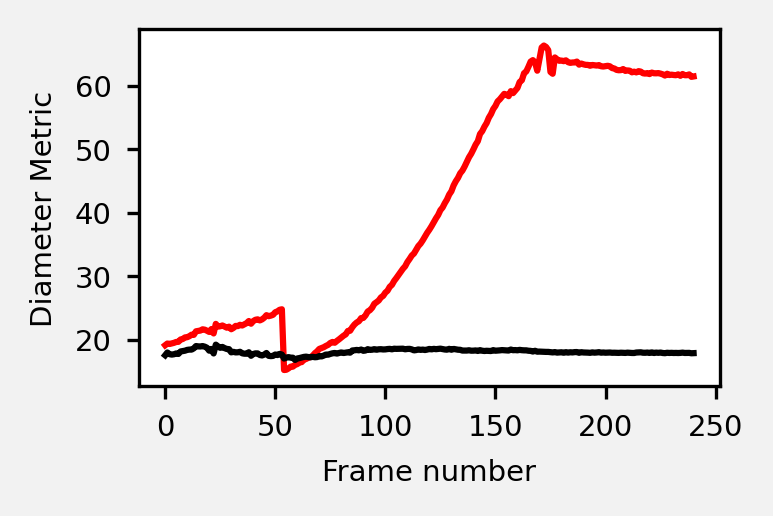

In [7]:
def set_size(w,h, ax=None):
    """ w, h: width, height in inches """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

from omnipose.utils import sinebow
master_color_scheme = [[i,0,0] for i in np.linspace(1,.5,3)]+[[i,i,i] for i in np.linspace(.75,0,n-3)]
golden = (1 + 5 ** 0.5) / 2
sz = 2.5
labelsize = 7

%matplotlib inline
darkmode = False
if darkmode:
    plt.style.use('dark_background')
    axcol = 'w'
    colors = sinebow(n+1)
    colors = [colors[j+1] for j in range(n)]
    background_color = 'k'
else:
    mpl.rcParams.update(mpl.rcParamsDefault)
    axcol = 'k'
    cmap = mpl.cm.get_cmap('viridis')
#     colors = cmap(np.linspace(0,.9,len(names)))
    colors = master_color_scheme
    background_color = np.array([242,242,242])/255
    
mpl.rcParams['figure.dpi'] = 300

fig = plt.figure(figsize=(sz, sz/golden)) 
ax = plt.axes()

plt.plot(range(n),diam_old,'r',range(n),diam_new,'k')

ax.legend(prop={'size': labelsize}, loc='best', frameon=False)
ax.tick_params(axis='both', which='major', labelsize=labelsize,length=3, direction="out",colors=axcol,bottom=True,left=True)
ax.tick_params(axis='both', which='minor', labelsize=labelsize,length=3, direction="out",colors=axcol,bottom=True,left=True)
ax.set_ylabel('Diameter Metric', fontsize = labelsize)
ax.set_xlabel('Frame number', fontsize = labelsize)
# plt.ylim([0,100])
fig.patch.set_facecolor(background_color)
plt.show()

save0 = '/home/kcutler/DataDrive/omnipose_all/diameter_metric/'
io.check_dir(save0)
name = 'ftsN_comparison'
fig.savefig(name+'.eps',bbox_inches='tight')
fig.savefig(name+'.png',bbox_inches='tight')

In [ ]:
cmap(.85)


In [11]:
V = io.imread('/home/kcutler/DataDrive/merge_ftsN/xy1/Vcrop.tif')